<a href="https://colab.research.google.com/github/Pulin98/Statistical-Learning-and-Neural-Network/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STATISTICAL LEARNING AND NEURAL NETWORKS, A.A. 2022/2023**

**COMPUTER LAB 2** - Model fitting and classification

**Duration: 6 hours**

**Exercise 1 – Model fitting for continuous distributions: Multivariate Gaussian**

In this exercise, you will employ a dataset based on the classic dataset *Iris Plants Database* https://archive.ics.uci.edu/ml/datasets/iris. You will be provided a subset of this dataset comprising only two classes (*Iris Setosa* and *Iris Versicolour*), and only two features per class (*petal length* in cm and *petal width* in cm). The objective is to the determine the kind of iris based on the content of the features.

**Task:** you have to fit class-conditional Gaussian multivariate distributions to the data, and visualize the probability density functions. In particular, you should perform the following:


*   Divide the dataset in two parts (*Iris Setosa* which corresponds to class zero and *Iris Versicolour* which correspond to class 1). Then work only on one class at a time.
*   Plot the data of each class (use the *plt.scatter( )* function)
*   Visualize the histogram of petal length and petal width (use e.g. the *plt.hist( )* function)
*   Calculate the maximum likelihood estimate of the mean and covariance matrix under a multivariate Gaussian model, independently for each class (these are the parameters of the class-conditional distributions). Note: is the Gaussian model good for these data?
*    Visualize the 2-D joint pdf of petal length and width for the two classes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

Dataset1 = h5py.File("/content/drive/MyDrive/Lab2SL/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset')) #100 rows and 3 columns

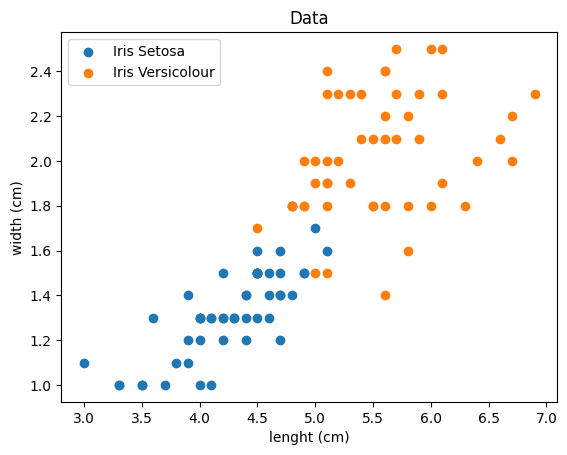

In [ ]:
#Separate the dataset in the two classes, you can use the numpy function argsort and unique to do this.
#Draw the scatter plot of the two classes on the same image

DataSort = Data[np.argsort(Data[:, 2])] #third column correspond to the class
classes, dimClass = np.unique(DataSort[:, 2], return_counts = True) #dimClass=[50,50],classes=[0,1]
Data0 = np.array(DataSort[:dimClass[0]]) #50 rows and 3 columns
Data1 = np.array(DataSort[dimClass[1]:]) #50 rows and 3 columns
plt.scatter(Data0[:, 0], Data0[:, 1], label="Iris Setosa")
plt.scatter(Data1[:, 0], Data1[:, 1], label="Iris Versicolour")
plt.title("Data")
plt.legend()
plt.xlabel("lenght (cm)")
plt.ylabel("width (cm)")
plt.show()

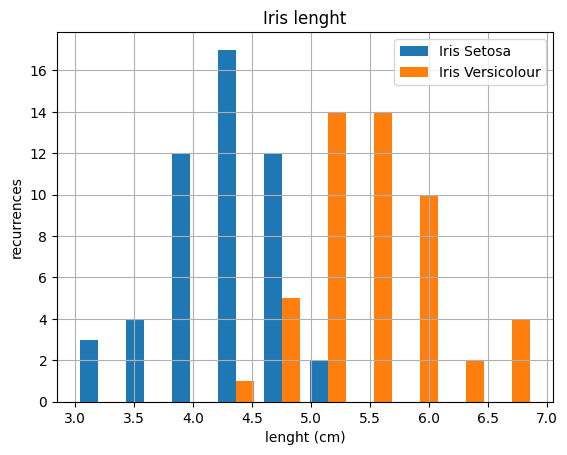

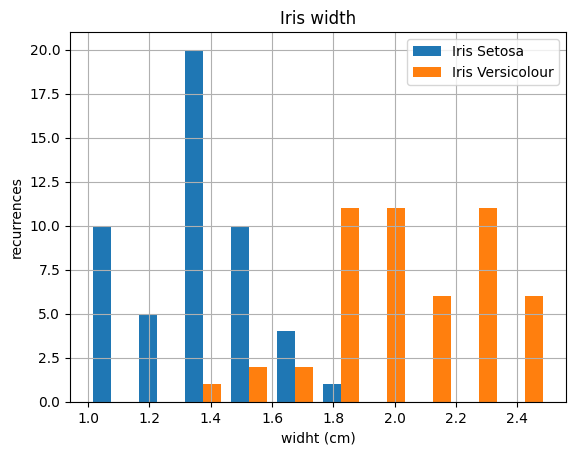

In [ ]:
#Visualize the histogram of petal length and petal width (use e.g. the plt.hist() function)

lenght = [Data0[:, 0], Data1[:, 0]]
plt.hist(lenght , histtype='bar', label=['Iris Setosa','Iris Versicolour'])
plt.legend()
plt.grid()
plt.xlabel("lenght (cm)")
plt.ylabel("recurrences")
plt.title("Iris lenght")
plt.show()

width = [Data0[:, 1], Data1[:, 1]]
plt.hist(width , histtype='bar', label=['Iris Setosa','Iris Versicolour'])
plt.legend()
plt.grid()
plt.title("Iris width")
plt.xlabel("widht (cm)")
plt.ylabel("recurrences")
plt.show()

In [ ]:
#Calculate mean and covariance matrix under a multivariate Gaussian model. Scalar products can be computed with the function np.matmul()
mean_0=np.array([np.sum(Data0[:,0])/len(Data0),np.sum(Data0[:,1]/len(Data0))])
mean_1=np.array([np.sum(Data1[:,0])/len(Data1),np.sum(Data1[:,1]/len(Data1))])
print('Mean0:',mean_0)
print('Mean1:',mean_1)
N=Data0.shape[0] #50

# Initialize the covariance matrix with zeros
cov0 = np.zeros((2, 2))
cov1 = np.zeros((2,2))

diff0=Data0[:,:2]-mean_0
diff0_t=np.transpose(diff0)
cov0=(1/(N-1))*np.matmul(diff0_t, diff0)

diff1=Data1[:,:2]-mean_1
diff1_t=np.transpose(diff1)
cov1=(1/(N-1))*np.matmul(diff1_t, diff1)

print('Cov0:',cov0)
print('Cov1:',cov1)

#The transpose can be obtained with the function np.transpose

#To make a scalar product between arrays in the form [Mx1]x[1xM] starting from 1D array A it may be necessary to add a new axis using
#the function A[:,np.newaxis]

Mean0: [4.26  1.326]
Mean1: [5.552 2.026]
Cov0: [[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
Cov1: [[0.30458776 0.04882449]
 [0.04882449 0.07543265]]


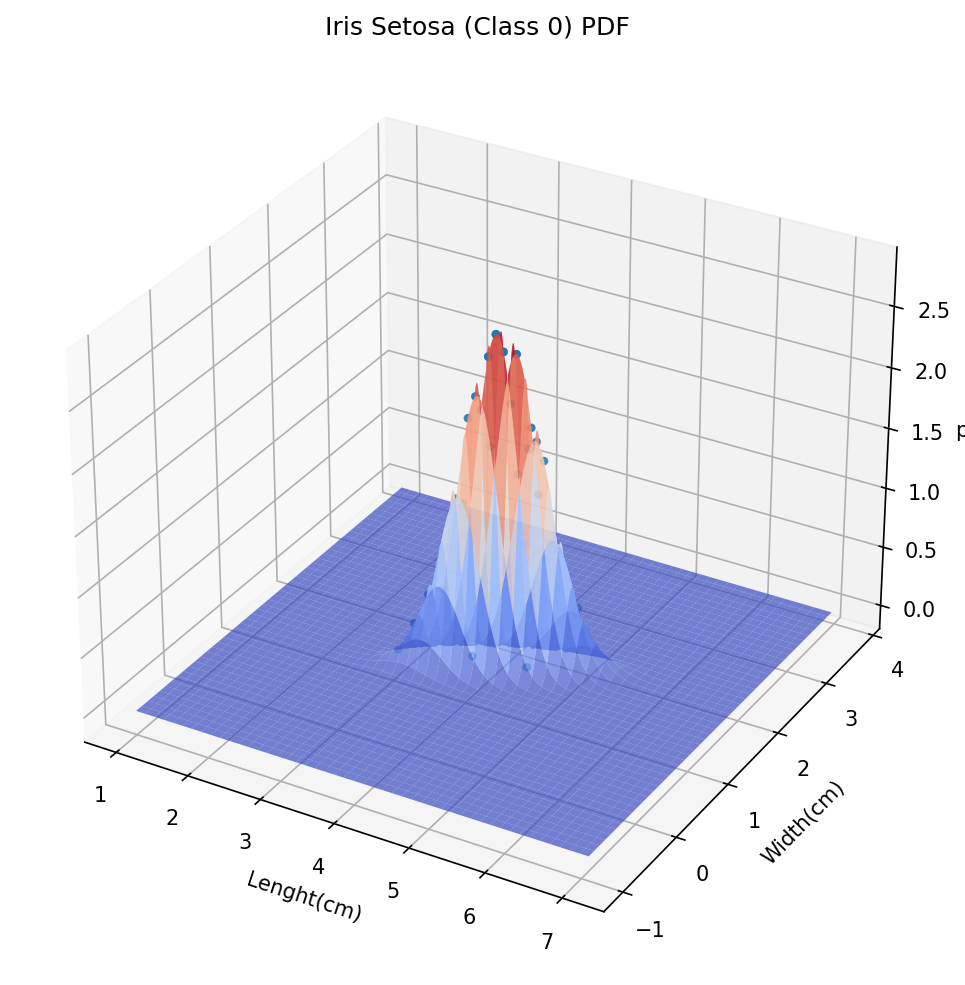

In [ ]:
#Visualize the 2-D joint pdf of petal length and width, a pdf function can be initialized by providing mean and covariance matrix
from scipy.stats import multivariate_normal
from matplotlib import cm
from matplotlib.ticker import LinearLocator

#Create a grid of x and y values on which to sample the pdf, this is done by providing a list of x-y of coordinates to the function pdf_class0.pdf(...)
#A 3D view of the pdf can be obtained using the function ax.plot_surface


#CLASS 0
pdf_class0 = multivariate_normal(mean_0, cov0)
X0 = np.arange(min(Data0[:,0]-2),max(Data0[:,0]+2),0.01)
Y0 = np.arange(min(Data0[:,1]-2),max(Data0[:,1]+2),0.01)

X0, Y0 = np.meshgrid(X0, Y0)
X_flat0 = X0.flatten()
Y_flat0 = Y0.flatten()
XY_list0 = np.concatenate((X_flat0[:,np.newaxis],Y_flat0[:,np.newaxis]),axis=1)
PDF_values0 = np.reshape(pdf_class0.pdf(XY_list0), np.shape(X0))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
ax.plot_surface(X0, Y0, PDF_values0, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax.set_xlabel('Lenght(cm)')
ax.set_ylabel('Width(cm)')
ax.set_zlabel('pdf')
ax.set_title('Iris Setosa (Class 0) PDF')


#To change the orientation of the 3D plot the function ax.view_init(), for a view from above select ax.view_init( 90, 0)

#After visualizing the pdf you can plot the points of the dataset on the estimated pdf using ax.scatter3D()
#For a better visualization of the points we suggest to make the pdf plot semi-transparent using the alpha parameter
Features_class0 = Data0[:,:2]
Points_Class0_Feature0=Features_class0[:,0]
Points_Class0_Feature1=Features_class0[:,1]

PDF_points_class0 = pdf_class0.pdf(Features_class0)
ax.scatter3D(Points_Class0_Feature0, Points_Class0_Feature1, PDF_points_class0, s=10)


#Note: the sample code was written only for class 0 but two plots have to be done, one for class 0 and one for class 1
#Note 2: the content of variables like Features_class0, Points_Class0_Feature0, Points_Class0_Feature1 should be substituted with variables created by the student

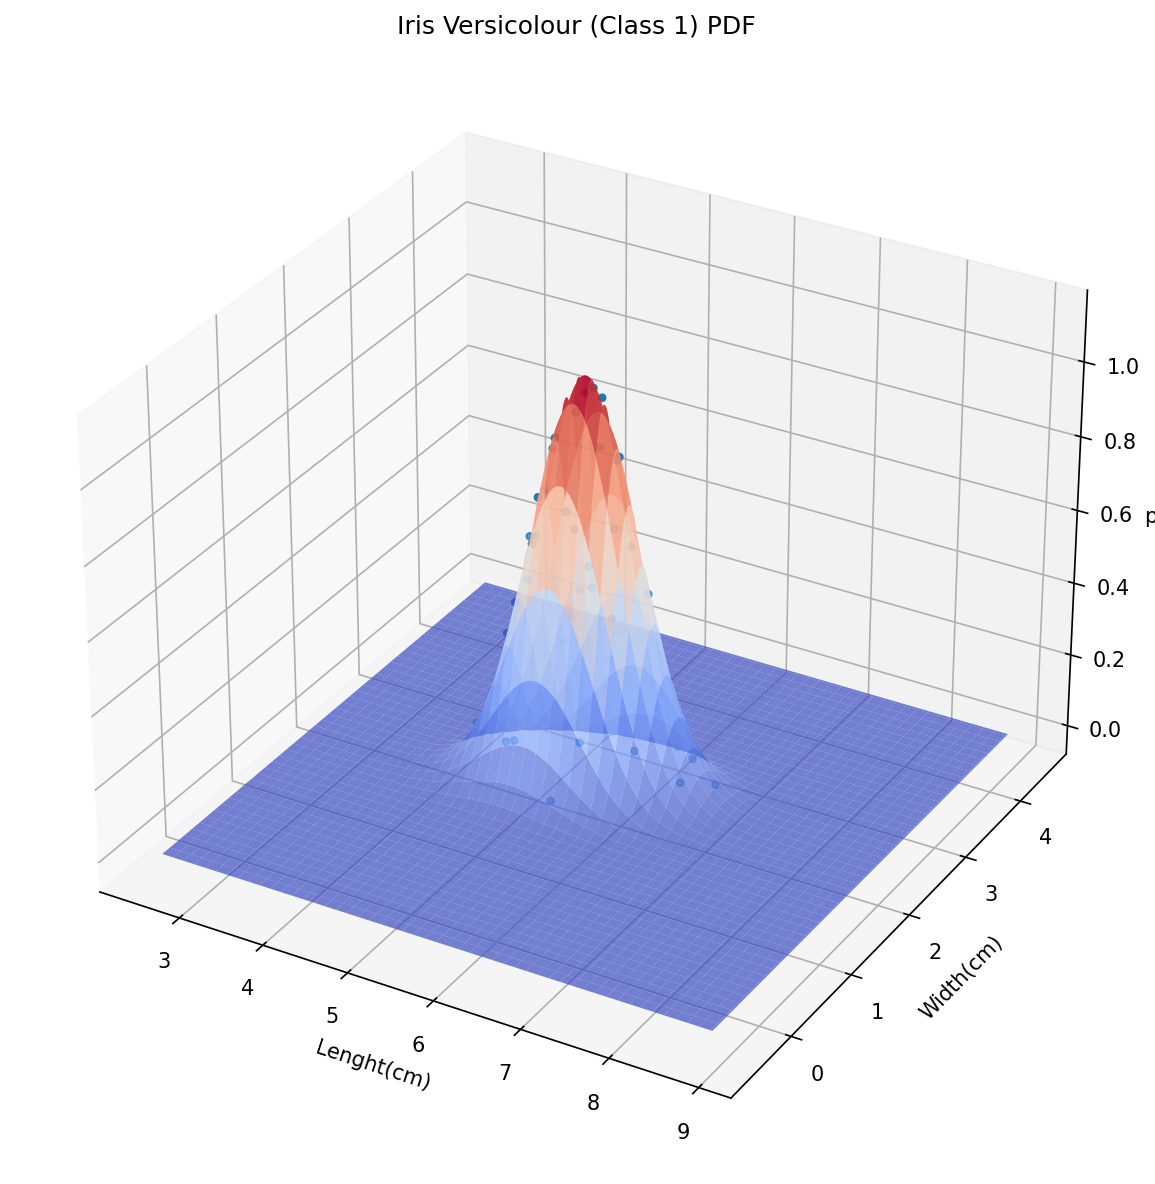

In [ ]:
#CLASS 1
pdf_class1 = multivariate_normal(mean_1, cov1)
X1 = np.arange(min(Data1[:,0]-2),max(Data1[:,0]+2),0.01)
Y1 = np.arange(min(Data1[:,1]-2),max(Data1[:,1]+2),0.01)

X1, Y1 = np.meshgrid(X1, Y1)
X_flat1 = X1.flatten()
Y_flat1 = Y1.flatten()
XY_list1 = np.concatenate((X_flat1[:,np.newaxis],Y_flat1[:,np.newaxis]),axis=1)
PDF_values1 = np.reshape(pdf_class1.pdf(XY_list1), np.shape(X1))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(8, 8), dpi=150)
ax.plot_surface(X1, Y1, PDF_values1, cmap=cm.coolwarm, alpha=0.7, linewidth=0)
ax.set_xlabel('Lenght(cm)')
ax.set_ylabel('Width(cm)')
ax.set_zlabel('pdf')
ax.set_title('Iris Versicolour (Class 1) PDF')

Features_class1 = Data1[:,:2]
Points_Class1_Feature0=Features_class1[:,0]
Points_Class1_Feature1=Features_class1[:,1]

PDF_points_class1 = pdf_class1.pdf(Features_class1)
ax.scatter3D(Points_Class1_Feature0, Points_Class1_Feature1, PDF_points_class1, s=10)

plt.tight_layout()
plt.show()

**Student's comments to Exercise 1**

In the analysis of the Iris dataset, we focused on two species, Iris Setosa and Iris Versicolour, and two features, petal length and width. The dataset was divided accordingly, and a multivariate Gaussian model was fit to each class independently to capture the distribution of these features.

Scatter plots of petal length versus width revealed distinct clustering by species, indicating that these features could be discriminative. Histograms provided further insight, showing the distribution of each feature within the classes, which seemed to follow the bell curve, suggesting that a Gaussian model might be appropriate.

The mean and covariance matrix for each class were computed, serving as parameters for the Gaussian distributions. Than the visualization of the 2-D joint probability density functions illustrated the likelihood of observing new data points for each class. The contours of these distributions encompassed the majority of the data points, indicating a reasonable fit of the Gaussian model.


**Exercise 2 - Model fitting for discrete distributions: Bag of Words**


In this exercise, you will employ a real dataset (file *SMSSpamCollection*). The SMS Spam Collection v.1 (https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset) is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.
Task: you have to fit the parameters employed by a Naïve Bayes Classifier, using a Bernoulli model. Under this model, the parameters are:

*   $\pi_{c}$, the prior probabilities of each class.
*   $\theta_{jc}$, the probability that feature j is equal to 1 in class c.

Model fitting can be done using the pseudocode at the end of the Lecture 3 slides.

Display the class-conditional densities $\theta_{jc1}$ and $\theta_{jc2}$. Try to identify “uninformative” features (i.e., features j such that $\theta_{jc1}$ ≃ $\theta_{jc2}$).

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# reading the data
data = pd.read_csv("/content/drive/MyDrive/Lab2SL/SMSSpamCollection", encoding="ISO-8859-1", sep="\t", header=None)
data.rename(columns={0: "labels", 1: "text"}, inplace=True)

# Transform data to bag of word representation
bagger = CountVectorizer(
    max_features=2500,
    binary=True,  # Bernulli Model
    token_pattern=r"(?u)\b[a-zA-Z][a-zA-Z]+\b",
)
bag = bagger.fit_transform(data["text"]).toarray()
feature_names = bagger.get_feature_names_out()

data = pd.concat([data, pd.DataFrame(bag, columns=feature_names)], axis=1)

X_train = data.iloc[:2000,2:].to_numpy()
X_test = data.iloc[2000:3000,2:].to_numpy()
y_train = data.iloc[:2000,0].to_numpy() == 'ham'
y_test = data.iloc[2000:3000,0].to_numpy() == 'ham'



In [ ]:
#Evaluate the prior probabilities of the two classes, and the class conditional densities.
y=y_train.astype(int) #vector of 2000 which says class of each message : 0 or 1 (SPAM or HAM)
N=X_train.shape[0] #2000 (tot messages in training set)
D=X_train.shape[1] #2500 (tot words)
C=2 #class 0 or 1 (SPAM or HAM)
Nc=np.zeros(C) # vector of 2 columns SPAM and HAM and count how many messages are of the 2 type (280,1720)
Njc=np.zeros((D,C)) #matrix with column SPAM or HAM and in each row count how many words in total for each class
for i in range(N):
 c=y[i] #class of the message
 Nc[c]+=1
 for j in range(D):
   if X_train[i][j]==1:
    Njc[j][c]+=1 #add +1 for each word in the message in column SPAM or HAM of Njc

prior=Nc/N #prior prob. of class 0 and 1
theta=(Njc+1)/(Nc+2) #probability that feature j is equal to 1 in class c
print('Prior:',prior)
print('Theta:',theta)
print(Nc)

Prior: [0.14 0.86]
Theta: [[0.0035461  0.00116144]
 [0.0035461  0.00174216]
 [0.0035461  0.00058072]
 ...
 [0.0035461  0.00232288]
 [0.0035461  0.00754936]
 [0.0070922  0.00058072]]
[ 280. 1720.]


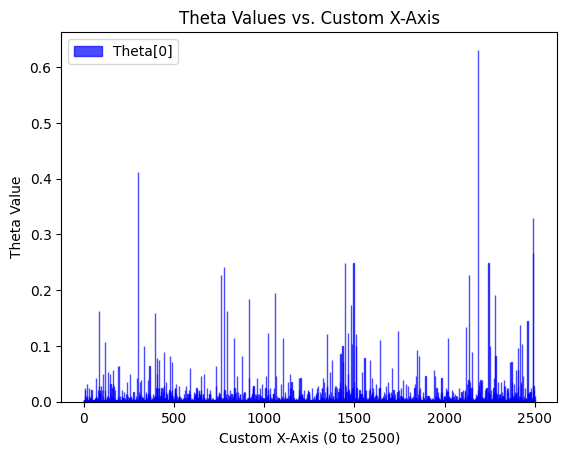

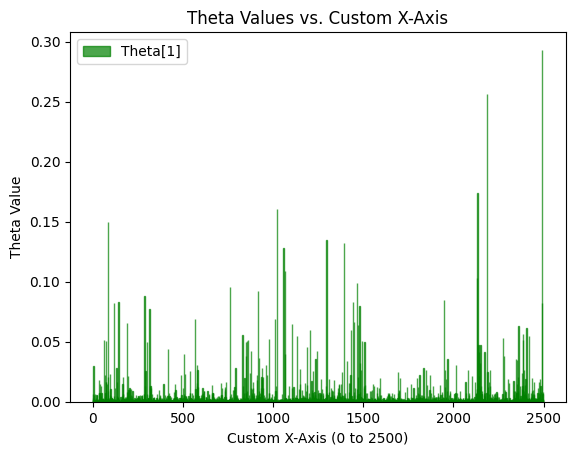

Number of “Uninformative” features: 2033


In [ ]:
#Display the class-conditional densities θjc1 and θjc2.
# Extract the two columns from the theta matrix
theta_0 = theta[:, 0]
theta_1 = theta[:, 1]


# # Create histograms for theta_0 with custom x-axis values
custom_x = np.arange(0, 2500)
plt.hist(custom_x, bins=custom_x, weights=theta_0, edgecolor='blue', color='blue', alpha=0.7, label='Theta[0]')
plt.xlabel('Custom X-Axis (0 to 2500)')
plt.ylabel('Theta Value')
plt.title('Theta Values vs. Custom X-Axis')
plt.legend()

plt.show()

# # Create histograms for theta_1 with custom x-axis values
plt.hist(custom_x, bins=custom_x, weights=theta_1, edgecolor='green', color='green', alpha=0.7, label='Theta[1]')
plt.xlabel('Custom X-Axis (0 to 2500)')
plt.ylabel('Theta Value')
plt.title('Theta Values vs. Custom X-Axis')
plt.legend()

plt.show()

# Identify uninformative features with a threshold
threshold = 0.01  # Define a threshold for similarity
uninfo = []
for i in range(D):
    if abs(theta_0[i] - theta_1[i]) < threshold:
        uninfo.append((i, feature_names[i]))

print('Number of “Uninformative” features:',len(uninfo))  # Print index and word of uninformative features

**Student's comments to Exercise 2**

In conducting an analysis with the Bernoulli Naïve Bayes classifier on the SMS Spam Collection dataset, the transformation of the dataset into a binary bag-of-words format was a critical initial step. The dataset was categorized into two classes:
* Class 0 for 'spam' messages
* Class 1 for 'ham' messages

The prior probabilities $\pi_{c}=\frac{N_{c}}{N}$ were calulated, where $N_{c}$ refers to the total number of messages in the respective class and N to the overall total number of messages in the training set. The result highlighted the existing imbalance in the dataset, with a predominance of 'ham' messages. Additionally, it is derived the class-conditional densities $\theta_{jc}=\frac{N_{jc}}{N}$, where $N_{jc}$ is the number of times the feature j occurs in the class c. It became evident that while some words were strongly associated with either 'spam' or 'ham', a significant number of words exhibited similar probabilities in both classes identifying them as "uninformative".

**Exercise 3 - Classification – discrete data**

In this exercise, you will design a Naïve Bayes Classifier (NBC) for the Bag of Words (BoW) features for document classification that have been prepared in *Exercise 2*. In particular, in *exercise 2*, you have already estimated the following parameters:


*   The prior probabilities of each class, $\pi_{c} = p(y=c)$.
*   The class-conditional probabilities of each feature, $\theta_{jc} = p(x_{j}=1 | y=c)$.

These parameters have been estimated from the training data. In this exercise, you will use the test data, and classify each test vector using an NBC whose model has been fitted in *Exercise 2*. In particular, you will do the following:



*   For each test vector, calculate the MAP estimate of the class the test vector belongs to. Remember: the MAP classifier chooses the class that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$. In the NBC, the features (i.e. each entry of $x$) are assumed to be statistically independent, so $p(x|y=c) = \prod_{j=1}^{D}p(x_{j}|y=c)$. This formula allows you to calculate $p(x|y=c)$ for a given test vector $x$ using the parameters $\theta_{jc}$ already calculated in *Exercise 2*. Note that, after the logarithm, the product
becomes a summation. It is much better to use the logarithm in order to avoid underflow.
*   See how the accuracy changes when the prior is not taken into account (e.g. by comparing the MLE and MAP estimate).
*   After classifying a test vector using the NBC, the obtained class can be compared with the truth (vector *ytest*).
*   The accuracy of the classifier can be computed as the percentage of times that the NBC provides the correct class for a test vector.
*   Repeat the same operations using the training data as test data, and compare the accuracy of the classifier on the training and test data.
*   Note: It is expected that students implement the Naive Bayes classifier from scratch without using pre-made functions such as sklearn.naive_bayes

**Optional:**

If you plot the class-conditional densities as done at the end of Exercise 2, you will see that many features are uninformative; e.g., words that appear very often (or very rarely) in documents belonging to either class are not very helpful to classify a document. The NBC can perform a lot better if these uninformative features are disregarded during the classification, i.e. only a subset of the features, chosen among the most informative ones, are retained. To rank the features by “significance”, one can employ the mutual information between feature $x_{j}$ and class $y$ (see Sec. 3.5.4 of the textbook):

\begin{align*}
I(X,Y) = \sum_{xj} \sum_{y}p(x_{j},y) \log \frac{p(x_{j},y)}{p(x_{j})p(y)}
\end{align*}

For binary features, the mutual information of feature j can be written as:

\begin{align*}
I_{j} = \sum_{c} \left[\theta_{jc}\pi_{c}\log \frac{\theta_{jc}}{\theta_{j}}+ (1 - \theta_{jc})\pi_{c} \log \frac{1 - \theta_{jc}}{1 - \theta_{j}}\right]
\end{align*}

with $\theta_{j}=p(x_{j}=1)=\sum_{c}\pi_{c}\theta_{jc}$. For this part, you should:


*   Calculate $I_{j}$ for all features. Note: try to avoid divisions by zero adding the machine precision constant *eps* to the denominators.
*   Rank the features by decreasing values of $I_{j}$, and keep only the $K$ most important ones.

*    Run the classifier employing only the $K$ most important features, and calculate the accuracy.

*    Plot the accuracy as a function of $K$.

In [ ]:
#Evaluate the MAP on the test set
# Calculate the log likelihoods

log_posterior_0=np.zeros(len(X_test))
log_posterior_1=np.zeros(len(X_test))
predictions = []
for i in range(X_test.shape[0]): #1000
    pi_0=(X_test[i])*theta_0+(1-X_test[i])*(1-theta_0) #I have to consider also the case the feature j is equal to 0 with prob=1-theta
    pi0=np.prod(pi_0)
    log_pi_0=np.log(pi0)
    pi_1=(X_test[i])*theta_1+(1-X_test[i])*(1-theta_1)
    pi1=np.prod(pi_1)
    log_pi_1=np.log(pi1)
    log_posterior_0[i] = np.log(prior[0]) + np.sum(log_pi_0)  # Calculate log posterior for class 0
    log_posterior_1[i] = np.log(prior[1]) + np.sum(log_pi_1)  # Calculate log posterior for class 1

    if log_posterior_0[i] > log_posterior_1[i]:
        predictions.append(0)  # Classify as class 0 (e.g., 'ham')
    else:
        predictions.append(1)  # Classify as class 1 (e.g., 'spam')

# Convert predictions to NumPy array for easier comparison
predictions = np.array(predictions)

# Calculate the accuracy on the test data
accuracy = np.mean(predictions == y_test)
print(f"Accuracy on test data MAP: {accuracy * 100:.2f}%")

#Evaluate the MLE on the test set
#MLE
predictions_MLE = []
for i in range(X_test.shape[0]):
    pi_0=(X_test[i])*theta_0+(1-X_test[i])*(1-theta_0)
    pi0=np.prod(pi_0)
    log_pi_0=np.log(pi0)
    pi_1=(X_test[i])*theta_1+(1-X_test[i])*(1-theta_1)
    pi1=np.prod(pi_1)
    log_pi_1=np.log(pi1)
    log_posterior_0_ = np.sum(log_pi_0)  # Calculate log posterior for class 0
    log_posterior_1_ = np.sum(log_pi_1)  # Calculate log posterior for class 1

    if log_posterior_0[i] > log_posterior_1[i]:
        predictions_MLE.append(0)  # Classify as class 0 (e.g., 'ham')
    else:
        predictions_MLE.append(1)  # Classify as class 1 (e.g., 'spam')

# Convert predictions to NumPy array for easier comparison
predictions_MLE = np.array(predictions)

# Calculate the accuracy on the test data
accuracy = np.mean(predictions_MLE == y_test)
print(f"Accuracy on test data MLE: {accuracy * 100:.2f}%")


Accuracy on test data MAP: 96.90%
Accuracy on test data MLE: 96.90%


In [ ]:
#Evaluate the MAP on the train set
# Calculate the log likelihoods

log_posterior_0=np.zeros(len(X_train))
log_posterior_1=np.zeros(len(X_train))
predictions = []
for i in range(X_train.shape[0]): #2000
    pi_0=(X_train[i])*theta_0+(1-X_train[i])*(1-theta_0) #I have to consider also the case the feature j is equal to 0 with prob=1-theta
    pi0=np.prod(pi_0)
    log_pi_0=np.log(pi0)
    pi_1=(X_train[i])*theta_1+(1-X_train[i])*(1-theta_1)
    pi1=np.prod(pi_1)
    log_pi_1=np.log(pi1)
    log_posterior_0[i] = np.log(prior[0]) + np.sum(log_pi_0)  # Calculate log posterior for class 0
    log_posterior_1[i] = np.log(prior[1]) + np.sum(log_pi_1)  # Calculate log posterior for class 1

    if log_posterior_0[i] > log_posterior_1[i]:
        predictions.append(0)  # Classify as class 0 (e.g., 'ham')
    else:
        predictions.append(1)  # Classify as class 1 (e.g., 'spam')

# Convert predictions to NumPy array for easier comparison
predictions = np.array(predictions)

# Calculate the accuracy on the test data
accuracy = np.mean(predictions == y_train)
print(f"Accuracy on train data MAP: {accuracy * 100:.2f}%")

#Evaluate the MLE on the train set
#MLE
predictions_MLE = []
for i in range(X_train.shape[0]):
    pi_0=(X_train[i])*theta_0+(1-X_train[i])*(1-theta_0)
    pi0=np.prod(pi_0)
    log_pi_0=np.log(pi0)
    pi_1=(X_train[i])*theta_1+(1-X_train[i])*(1-theta_1)
    pi1=np.prod(pi_1)
    log_pi_1=np.log(pi1)
    log_posterior_0_ = np.sum(log_pi_0)  # Calculate log posterior for class 0
    log_posterior_1_ = np.sum(log_pi_1)  # Calculate log posterior for class 1

    if log_posterior_0[i] > log_posterior_1[i]:
        predictions_MLE.append(0)  # Classify as class 0 (e.g., 'ham')
    else:
        predictions_MLE.append(1)  # Classify as class 1 (e.g., 'spam')

# Convert predictions to NumPy array for easier comparison
predictions_MLE = np.array(predictions)

# Calculate the accuracy on the test data
accuracy = np.mean(predictions_MLE == y_train)
print(f"Accuracy on test data MLE: {accuracy * 100:.2f}%")




Accuracy on train data MAP: 98.70%
Accuracy on test data MLE: 98.70%


In [ ]:
#Optional section

**Student's comments to Exercise 3**

The Maximum A Posteriori (MAP) estimate for each test vector was calculated using a Naïve Bayes Classifier (NBC).  The MAP classifier selects the class c that maximizes $\mathop{\max\limits_c{\log p(y=c|x)} \propto \log p(x|y=c)} + \log p(c)$.  Given the assumption of independence of features in the NBC, $p(x|y=c)$ can be calculated as the product of individual feature probabilities, which after taking the logarithm, becomes a summation.

Additionally, the Maximum Likelihood Estimation (MLE) was also calculated for comparison. Interestingly, it was observed that the results of the MAP and MLE estimates were identical in this scenario. This equivalence can be attributed to the large sample size (N) of the dataset. In such cases, the influence of the prior probabilities (which differentiate MAP from MLE) becomes less significant, and the large amount of data tends to overshadow the effect of these priors.

[testo del link](https://)**Exercise 4 – Plotting the ROC curve**

For the discrete data classification problem of Exercise 3, analyse the performance of the classifier plotting the complete ROC curve, instead of simply measuring the accuracy. This requires to do the following.

*   Instead of classifying the documents choosing class 1 if $p(y=1|x)>p(y=2|x)$, now you can generalize this to choosing class 1 if $\frac{p(y=1|x)}{p(y=2|x)}>\tau \in [0, \infty)$ for some threshold $\tau$ that determines the compromise between true positive rate (TPR) and false positive rate (FPR).
*   Choose a **reasonable** range of values for $\tau$. For each value of $\tau$, compute the TPR and FPR on the dataset (Hint: determine suitable minimum and maximum values for $\tau$, and sample densely enough in that range).
* Plot a curve of TPR as a function of FPR – this is the ROC curve for this classifier.

*   Determine an estimate of the Equal Error Rate (EER), i.e. the point of the ROC curve such that TPR+FPR=1.

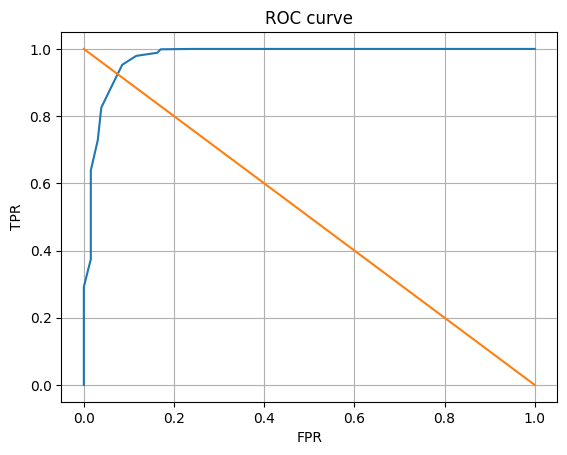

In [ ]:

#Use the posterior probabilities previously and classify using the formula above to estimate tau

Tau = np.arange(0, 1000, 0.05)
def calcRates(tau):
  roc = []
  for i in range(len(y_test)):
    if log_posterior_0[i]/log_posterior_1[i] > tau:
      roc.append(1)
    else:
      roc.append(0)
  TPR = 0
  FPR = 0
  count0 = 0
  count1 = 0
  for i in range (len(y_test)):
    if y_test[i] == 1:
      count1 += 1
    else:
      count0 += 1
    if roc[i] == 1:
      if y_test[i] == 1:
        TPR += 1
      else:
        FPR += 1
  return TPR/count1, FPR/count0

TPR = np.zeros(len(Tau))
FPR = np.zeros(len(Tau))
for i in range(Tau.shape[0]):
  TPR[i], FPR[i] = calcRates(Tau[i])

# Find the EER where TPR = 1 - FPR
# This can be found where the difference between TPR and (1 - FPR) is the smallest
EER_index = np.argmin(np.abs(TPR - (1 - FPR)))
EER_threshold = Tau[EER_index]
EER_value = TPR[EER_index]

plt.plot(FPR,TPR)
plt.plot(FPR, 1-FPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve")
plt.grid()
plt.show()


#Note: To estimate the TPR you need to compute the number of cases where class 1 is correctly predicted,
#this value then has to be divided by the number of elements in the test set which belong to class 1

#The FPR is computed by selecting the number of cases where class 1 is predicted incorrectly,
#this value then has to be divided by the number of elements in the test set which do not belong to class 1

#The point corresponding to the EER can be found by plotting on the ROC curve the function y = 1 - x

**Student's comments to Exercise 4**

The performance of the Naïve Bayes Classifier was thoroughly analyzed through the construction of a Receiver Operating Characteristic (ROC) curve plotted over a wide range of threshold values τ, from 0 to 1000, incremented in steps of 0.05.
This approach provided a detailed view of the classifier's performance, illustrating the trade-offs between True Positive Rate (TPR) and False Positive Rate (FPR) across different decision thresholds. The small incremented τ values allowed for a precise determination of the Equal Error Rate (EER), offering key insights into the classifier's balance between false positives and false negatives.
Analyzing the plot, the curve rapidly rises towards the upper region of the plot, suggesting a high True Positive Rate (TPR) is achieved at a low False Positive Rate (FPR), indicative of an effective classifier. Moreover, the intersection of the ROC curve with the line ($y = 1 - x$) points to the EER, which represents the point where the true positive rate equals the false positive rate.

**Exercise 5 – Classification – continuous data**

This exercise employs the Iris dataset already employed in Exercise 1, and performs model fitting and classification using several versions of **Gaussian discriminative analysis**. However, for this exercise the available data have to be divided into two sets, namely *training* and *test* data.

You will have to 1) re-fit the training data to the specific model (see below), 2) classify each of the test samples, and 3) calculate the accuracy of each classifier.

Classifiers to be employed:
*   Two-class quadratic discriminant analysis (fitting: both mean values and covariance matrices are class-specific – same as in exercise 1).
*   Two-class linear discriminant analysis (fitting: class-specific mean values as in the previous case. Shared covariance matrix is calculated putting together the elements of both classes; the mean values should also be recalculated accordingly).

In [ ]:
import numpy as np
import h5py

# Load the dataset
Dataset1 = h5py.File("/content/drive/MyDrive/Lab2SL/Lab2_Ex_1_Iris.hdf5")
Data = np.array(Dataset1.get('Dataset'))

# Splitting the data into training and test sets
Train = Data[:50, :]
Test = Data[50:, :]

# Separate the data by class for training data
DataSort = Data[np.argsort(Data[:, 2])]
classes, dimClass = np.unique(DataSort[:, 2], return_counts = True)
Data0 = np.array(DataSort[:dimClass[0]])
Data1 = np.array(DataSort[dimClass[1]:])

#mean and covariance matrix
mean_0=np.array([np.sum(Data0[:,0])/len(Data0),np.sum(Data0[:,1]/len(Data0))])
mean_1=np.array([np.sum(Data1[:,0])/len(Data1),np.sum(Data1[:,1]/len(Data1))])
cov_0 = np.zeros((2, 2))
cov_1 = np.zeros((2,2))

diff0=Data0[:,:2]-mean_0
diff0_t=np.transpose(diff0)
cov_0=(1/(N-1))*np.matmul(diff0_t, diff0)

diff1=Data1[:,:2]-mean_1
diff1_t=np.transpose(diff1)
cov_1=(1/(N-1))*np.matmul(diff1_t, diff1)
# Compute shared covariance for LDA
cov_shared = (cov_0 * len(Data0) + cov_1 * len(Data1)) / (len(Data0) + len(Data1))

#Priors
prior0=Data0.shape[0]/(Data.shape[0])
prior1=Data1.shape[0]/(Data.shape[0])

# Classify test data
X_test = Test[:, :2]
y_test = Test[:, 2]

# For QDA
inv_cov_0 = np.linalg.inv(cov_0)
inv_cov_1 = np.linalg.inv(cov_1)
det_cov_0 = np.linalg.det(cov_0)
det_cov_1 = np.linalg.det(cov_1)

# Calculate the QDA score for each class
qda_score_0 = -0.5 * np.log(det_cov_0) - 0.5 * np.sum((X_test - mean_0) @ inv_cov_0 * (X_test - mean_0), axis=1) + np.log(prior0)
qda_score_1 = -0.5 * np.log(det_cov_1) - 0.5 * np.sum((X_test - mean_1) @ inv_cov_1 * (X_test - mean_1), axis=1) + np.log(prior1)

# QDA Predictions and Accuracy
QDA_predictions = np.argmax(np.vstack([qda_score_0, qda_score_1]), axis=0)
QDA_accuracy = np.mean(QDA_predictions == y_test)

# For LDA
inv_cov_shared = np.linalg.inv(cov_shared)
det_cov_shared = np.linalg.det(cov_shared)

# Calculate the LDA score for each class
beta0 = inv_cov_shared @ mean_0
beta1 = inv_cov_shared @ mean_1
gamma0 = - 0.5 * np.dot(mean_0.T, inv_cov_shared @ mean_0) + np.log(prior0)
gamma1 = - 0.5 * np.dot(mean_1.T, inv_cov_shared @ mean_1) + np.log(prior1)
lda_score_0 = np.dot(X_test, beta0) + gamma0
lda_score_1 = np.dot(X_test, beta1) + gamma1

# Calculate the LDA probabilities using the softmax function
#La funzione softmax trasforma gli score lineari in probabilità normalizzate che sommano a 1 per ogni campione di test.
#Quindi, i punteggi più alti corrisponderanno alle classi con le maggiori probabilità previste dal modello.
lda_scores = np.vstack([lda_score_0, lda_score_1])
lda_probabilities = np.exp(lda_scores - np.max(lda_scores, axis=0)) / np.sum(np.exp(lda_scores - np.max(lda_scores, axis=0)), axis=0)
#is a 2-row matrix where each column represents the probabilities for each class (class 0 and class 1)

# LDA Predictions and Accuracy
LDA_predictions = np.argmax(lda_probabilities, axis=0)
LDA_accuracy = np.mean(LDA_predictions == y_test)
print(f"Accuracy of Linear Discriminant Analysis: {LDA_accuracy:.4f}")
print(f"Accuracy of Quadratic Discriminant Analysis: {QDA_accuracy:.4f}")

Accuracy of Linear Discriminant Analysis: 0.9000
Accuracy of Quadratic Discriminant Analysis: 0.9400


**Student's comments to Exercise 5**

The Iris dataset analysis demonstrated that Quadratic Discriminant Analysis (QDA), with an accuracy of 0.9400, slightly outperformed Linear Discriminant Analysis (LDA), which achieved an accuracy of 0.9000. The results indicate that both classifiers perform well, with QDA providing a slight edge in accuracy due to its ability to model a more flexible decision boundary since the Iris dataset likely exhibits varying covariance structures among its classes.

**Exercise 6 – Classification – continuous data**

Classify the data in the phoneme dataset from Lab. 1 using quadratic discriminant analysis, linear discriminat analysis and a Naive Bayes classifier.

Compute the accuracy of each classifier and compare its performance with that of the k-nn classifier developed in Lab. 1.

Note: in Lab1 we had to employ a subset of the oiginal dataset due to the fact that k-nn has a quadratic complexity making it unfit for use on large datasets. The algorithms illustrated in this Lab have smaller complexity and thus it is possible to train on more data.

For this exercise you can use the sklearn library.

In [ ]:
import numpy as np
import h5py
from scipy.stats import multivariate_normal

Dataset2 = h5py.File("/content/Lab2_Ex_6_phoneme.hdf5")
Data = np.array(Dataset2.get('Dataset'))

Train = Data[:4000,:]
Test = Data[4000:,:]
len_dat = np.shape(Test)[0]

from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Extracting features and labels
X_train = Train[:, :-1]  # Features in the training set
y_train = Train[:, -1]   # Labels in the training set
X_test = Test[:, :-1]    # Features in the test set
y_test = Test[:, -1]     # Labels in the test set

#Part 1
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
y_pred_lda = clf.predict(X_test)
accuracy_lda = metrics.accuracy_score(y_test, y_pred_lda)

#Part 2
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X_train, y_train)
y_pred_qda = clf2.predict(X_test)
accuracy_qda = metrics.accuracy_score(y_test, y_pred_qda)

#Part 3
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred_nb = clf3.predict(X_test)
accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)

# Comparing accuracies
print(f"Accuracy of Linear Discriminant Analysis: {accuracy_lda:.4f}")
print(f"Accuracy of Quadratic Discriminant Analysis: {accuracy_qda:.4f}")
print(f"Accuracy of Naive Bayes Classifier: {accuracy_nb:.4f}")

Accuracy of Linear Discriminant Analysis: 0.9411
Accuracy of Quadratic Discriminant Analysis: 0.8880
Accuracy of Naive Bayes Classifier: 0.9018


**Student's comments to Exercise 6**


In the classification of the phoneme dataset, Linear Discriminant Analysis (LDA) achieved the highest accuracy (0.9411), outperforming both Quadratic Discriminant Analysis (QDA) with an accuracy of 0.8880, and the Naive Bayes Classifier at 0.9018. This suggests that the assumptions underlying LDA, particularly the shared covariance matrix, are well-suited to this dataset. The lower performance of QDA might indicate overfitting or unnecessary complexity for this data, while the Naive Bayes' respectable accuracy demonstrates its effectiveness despite its simplicity. Compared to the k-nn classifier from Lab 1, these results highlight the efficiency and effectiveness of lower complexity models like LDA in handling larger datasets.